In [ ]:
# pip install biopython

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
from IPython.display import Image
from IPython.core.display import HTML

# 1
Dr. X: this gets sequences 
Please properly document this function in the Jupyter notebook. Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments.

In [2]:
def get_sequences_from_file(fasta_fn):
    # Create an empty dictionary `sequence_data_dict`
    sequence_data_dict = {}
    # Read `fasta_fn`, save as `SeqRecord` iterator object
    for record in SeqIO.parse(fasta_fn, "fasta"):
        # For each `record` in the `SeqRecord` iterator
        # Split the sequence description by space, save as a list of string `description`
        description = record.description.split()
        # Paste 2nd and 3rd element in the `description` list, split by space
        # Save pasted text as `species_name`
        species_name = description[1] + " " + description[2]
        # Save `species_name` and its corresponding `record` sequence
        # as key-value pair in dictionary `sequence_data_dict`
        sequence_data_dict[species_name] = record.seq
    # Return as a dictionary where species name as key and sequence as value
    return(sequence_data_dict)

In [3]:
# Read penguins_cytb.fasta from GitHub URL
fasta_url = "https://raw.githubusercontent.com/EEOB-BioData/BCB546_Spring2023/main/assignments/Python_Assignment/penguins_cytb.fasta"
fasta_txt = StringIO(requests.get(fasta_url).text)

# Save the parsed fasta file as dictionary of species_name - sequence pairs
fa_dict = get_sequences_from_file(fasta_txt)
fa_dict

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

## 2
YOUR STRING-TRANSLATE FUNCTION
Write a function that translates sequences
All sequences start at codon position 1
Complete a function that translates using a loop over the string of nucleotides
Here is  some pseudo-code and suggestions
feel free to change the function and variable names
```
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
#     this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

```

In [4]:
def translate_function(string_nucleotides):
    # Create the conda table
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    # Create an empty list `aa_seq_string`
    aa_seq_string = []
    # Loop through every 3rd position up to the length of input sequence
    for idx in range(0, len(string_nucleotides), 3):
        # Subset the sequence by the index position and its following 2 base as codon
        codon = string_nucleotides[idx:(idx+3)]
        # Find if the amino acid of the codon in `forward_table`
        if codon in mito_table.forward_table.keys():
            aa = mito_table.forward_table[codon]
        # If the sequence has a stop codon at the end, leave it off
        if codon in mito_table.stop_codons:
            aa = ""
        # Append the amino acid to the list
        aa_seq_string.append(aa)
    aa_seq_string = Seq("".join(aa_seq_string))
    return(aa_seq_string)

In [5]:
# Sample output of `translate_function`
fa_dict_trans = {}
for key, value in fa_dict.items():
    fa_dict_trans[key] = translate_function(value)
fa_dict_trans

{'Aptenodytes forsteri': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH'),
 'Aptenodytes patagonicus': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH'),
 'Eudyptes chrysocome': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH'),
 'Eudyptes chrysolophus': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH'),
 'Eudyptes sclateri': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH'),
 'Eudyptula minor': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISTWWNFGSLLGICLITQILTGLLLAA...LSH'),
 'Pygoscelis adeliae': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH'),
 'Pygoscelis antarctica': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNF'),
 'Pygoscelis papua': Seq('MAPNLRKSHPLLKMINKSLIDLPTPPNISAWWNFGSLLGICLITQILTGLLLAM...LNF'),
 'Spheniscus demersus': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH'),
 'Spheniscus humboldti': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLSIC

## 3
YOUR ALTERNATIVE FUNCTION
Is there a better way to write the translation function? (Hint: yes there is.) 
Perhaps using available BioPython library utilities?
Please also write this function.

In [6]:
def translate_function_alt(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    # Use the `NCBICodonTable` to translate codon to aa
    # If the sequence has a stop codon at the end, leave it off
    aa_seq_string_alt = string_nucleotides.translate(table = mito_table)[:-1]
    return(aa_seq_string_alt)

In [7]:
# Sample output of `translate_function_alt`
fa_dict_trans_alt = {}
for key, value in fa_dict.items():
    fa_dict_trans_alt[key] = translate_function(value)
fa_dict_trans_alt

{'Aptenodytes forsteri': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH'),
 'Aptenodytes patagonicus': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH'),
 'Eudyptes chrysocome': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH'),
 'Eudyptes chrysolophus': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH'),
 'Eudyptes sclateri': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH'),
 'Eudyptula minor': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISTWWNFGSLLGICLITQILTGLLLAA...LSH'),
 'Pygoscelis adeliae': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH'),
 'Pygoscelis antarctica': Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNF'),
 'Pygoscelis papua': Seq('MAPNLRKSHPLLKMINKSLIDLPTPPNISAWWNFGSLLGICLITQILTGLLLAM...LNF'),
 'Spheniscus demersus': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH'),
 'Spheniscus humboldti': Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLSIC

In [8]:
# Check the alternative function `translate_function_alt` yields
# the same output as `translate_function` in Question 2
fa_dict_trans == fa_dict_trans_alt

True

## 4
YOUR COUNT AA ANALYSIS FUNCTION
Write a function that calculates the molecular weight of each amino acid sequence.
For this, you can use some BioPython functions. I think you can use the ProtParam module.
For more info, check this out: http://biopython.org/wiki/ProtParam
So you should import the following before defining your function:
```
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight
```

In [11]:
def compute_molecular_weight(aa_seq):
    # Run the `ProteinAnalysis()` function on aa_seq
    aa_analysis = ProteinAnalysis(str(aa_seq))
    # Calculates the molecular weight of amino acid sequence
    seq_weight = aa_analysis.molecular_weight()
    return(seq_weight)

In [12]:
# Sample output of `compute_molecular_weight`
weight_dict = {}
for key, value in fa_dict_trans_alt.items():
    weight_dict[key] = compute_molecular_weight(value)
weight_dict

{'Aptenodytes forsteri': 42459.602100000004,
 'Aptenodytes patagonicus': 42563.70669999999,
 'Eudyptes chrysocome': 42475.5753,
 'Eudyptes chrysolophus': 42445.54929999999,
 'Eudyptes sclateri': 42475.5753,
 'Eudyptula minor': 42491.64080000001,
 'Pygoscelis adeliae': 42458.61400000001,
 'Pygoscelis antarctica': 42404.54230000001,
 'Pygoscelis papua': 42595.87590000001,
 'Spheniscus demersus': 42431.54900000002,
 'Spheniscus humboldti': 42399.55200000001,
 'Spheniscus magellanicus': 42459.60210000002}

## 5
YOUR GC CONTENT ANALYSIS FUNCTION
Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

```
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)
```

In [13]:
def GC_content(string_nucleotides):
    # Count "G" and "C" in sequence
    GC_count = string_nucleotides.count("G") + string_nucleotides.count("C")
    # Calculate the proportion of "G" and "C"
    GC_proportion = GC_count/len(string_nucleotides)
    return(GC_proportion)

In [14]:
# Output of `GC_content` function
GC_dict = {}
for key, value in fa_dict.items():
    GC_dict[key] = GC_content(value)
GC_dict

{'Aptenodytes forsteri': 0.48381452318460194,
 'Aptenodytes patagonicus': 0.4969378827646544,
 'Eudyptes chrysocome': 0.5118110236220472,
 'Eudyptes chrysolophus': 0.5091863517060368,
 'Eudyptes sclateri': 0.5083114610673666,
 'Eudyptula minor': 0.4925634295713036,
 'Pygoscelis adeliae': 0.49081364829396323,
 'Pygoscelis antarctica': 0.4776902887139108,
 'Pygoscelis papua': 0.4715660542432196,
 'Spheniscus demersus': 0.48293963254593175,
 'Spheniscus humboldti': 0.4925634295713036,
 'Spheniscus magellanicus': 0.4820647419072616}

## 6
Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
Set the value to 'NaN' to indicate that these cells are currently empty.

In [15]:
# Read penguins_cytb.fasta from GitHub URL
fasta_url = "https://raw.githubusercontent.com/EEOB-BioData/BCB546_Spring2023/main/assignments/Python_Assignment/penguins_cytb.fasta"
fasta_txt = StringIO(requests.get(fasta_url).text)
cytb_seqs = get_sequences_from_file(fasta_txt)

# Read penguins_mass.csv from Github URL
csv_url = "https://raw.githubusercontent.com/EEOB-BioData/BCB546_Spring2023/main/assignments/Python_Assignment/penguins_mass.csv"
penguins_df = pd.read_csv(csv_url)
species_list = list(penguins_df.species)

# Add two new columns to the penguin DataFrame
penguins_df["molecular_weight"] = np.nan
penguins_df["GC_content"] = np.nan
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## 7
Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
of each translated sequence and adds those data to DataFrame

```
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above
```

In [16]:
for key, value in cytb_seqs.items():
    aa_seq = translate_function_alt(value)
    molecular_weight = compute_molecular_weight(aa_seq)
    GC_prop = GC_content(value)
    row_idx = int(np.where(penguins_df['species'] == key)[0])
    penguins_df.at[row_idx, 'molecular_weight'] = molecular_weight
    penguins_df.at[row_idx, 'GC_content'] = GC_prop

penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311
5,Eudyptula minor,1.60,42491.6408,0.492563
6,Pygoscelis adeliae,4.60,42458.6140,0.490814
7,Pygoscelis antarctica,4.10,42404.5423,0.477690
8,Pygoscelis papua,6.10,42595.8759,0.471566
9,Spheniscus demersus,3.20,42431.5490,0.482940


## 8
Plot a bar-chart of the mass with the x-axes labeled with species names.
*Q1* What is the smallest penguin species? 
*Q2* What is the geographical range of this species?

/var/folders/5m/t_5pbwrs1wb3w0hmphmlbdzh0000gs/T/ipykernel_11350/3340726553.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(penguins_df["species"], rotation = 90)


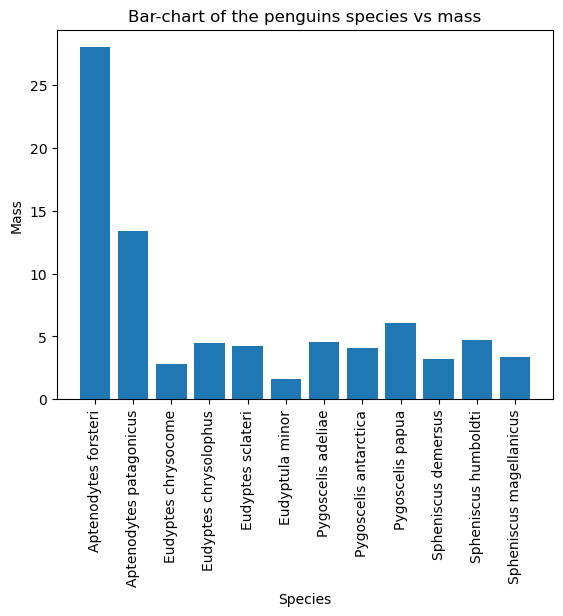

In [17]:
fig, ax = plt.subplots()

ax.bar("species", "mass", data = penguins_df)
ax.set_title("Bar-chart of the penguins species vs mass")
ax.set_xlabel("Species")
ax.set_xticklabels(penguins_df["species"], rotation = 90)
ax.set_ylabel("Mass")

plt.show()

In [18]:
# Image of Eudyptula minor
Image(url = "https://upload.wikimedia.org/wikipedia/commons/3/38/Eudyptula_minor_Bruny_1.jpg",  width = 600)

*Q1* What is the smallest penguin species?  

Eudyptula minor. 


*Q2* What is the geographical range of this species?  

The little penguin (Eudyptula minor) is a species of penguin from New Zealand.

Reference: https://en.wikipedia.org/wiki/Little_penguin



## 9
Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

Text(0, 0.5, 'Molecular Weight')

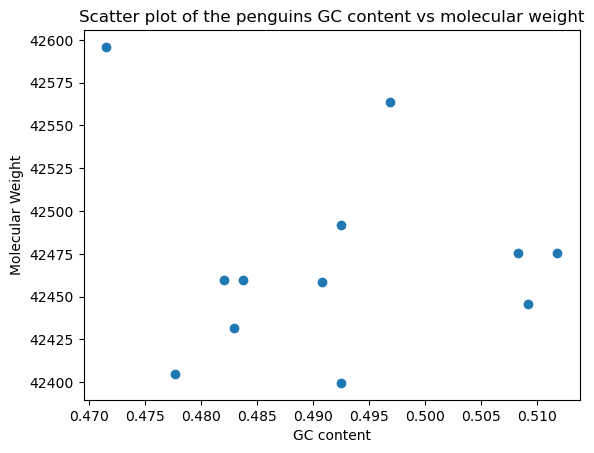

In [19]:
plt.scatter("GC_content", "molecular_weight", data = penguins_df)
plt.title("Scatter plot of the penguins GC content vs molecular weight")
plt.xlabel("GC content")
plt.ylabel("Molecular Weight")

## 10
Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [20]:
penguins_df.to_csv("penguins_mass_cytb.csv")

## 11 - BONUS
What else can we do with this dataset in Python? 
Add functions or anything that might be interesting and fun. (optional)